<a target="_blank" href="https://colab.research.google.com/github/Detroxsys/RP-2023-2/blob/main/Laboratorios/Lab03%20Reconocimiento%20de%20Patrones%20en%20Im%C3%A1genes/Lab02_Gu%C3%ADa_Representaci%C3%B3n_de_Im%C3%A1genes.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Laboratorio 03: OpenCV para manipulación de imágenes

Paquetes necesarios 

* [OpenCV](https://anaconda.org/conda-forge/opencv). [Documentación](https://docs.opencv.org/4.x/)
* Numpy 
* Matplotlib

### Importar imágenes en OpenCV

In [36]:
import cv2
from urllib.request import urlopen
from google.colab.patches import cv2_imshow #Para mostrar imágenes en google colab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
  """
    Función para extraer una imagen desde una url. 

    Parámetros: 
      url: La url de la imagen (debe ser de dominio público)
      readFlag: Modo de lectura de cv2.https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html
  """
  resp = urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, readFlag)

  # return the image
  return image

Leemos la siguiente imagen: 

![Mandrill](https://raw.githubusercontent.com/Detroxsys/RP-2023-2/main/Imagenes/mandrill_colour.png)



In [38]:
img_raw = url_to_image('https://raw.githubusercontent.com/Detroxsys/RP-2023-2/main/Imagenes/mandrill_colour.png')

In [39]:
# Saber el tipo y la forma de la matriz. La imagen es una matriz numpy con una forma de 288×288 y con 3 canales.
print(type(img_raw), img_raw.shape)

<class 'numpy.ndarray'> (288, 288, 3)


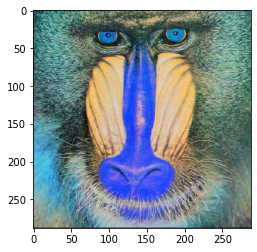

In [40]:
# Ver la imagen
plt.imshow(img_raw)

Lo que obtenemos como resultado es un poco diferente con respecto al color. Esperábamos una imagen de colores brillantes, pero lo que obtenemos es una imagen con cierto matiz azulado.

Eso sucede porque OpenCV y matplotlib tienen diferentes órdenes de colores primarios. Mientras que OpenCV lee imágenes en forma de BGR, matplotlib, por otro lado, sigue el orden RGB.

Por lo tanto, cuando leemos un archivo a través de OpenCV, lo leemos como si contuviera canales en el orden de azul, verde y rojo.

Sin embargo, cuando mostramos la imagen usando matplotlib, el canal rojo y el azul se intercambian y, de ahí, el tinte azul.

Para evitar este problema, transformaremos el canal a la forma en que matplotlib espera que se use la función cvtColor.

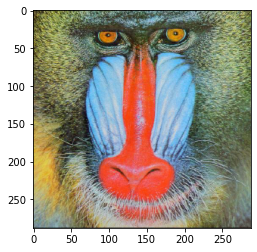

In [41]:
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

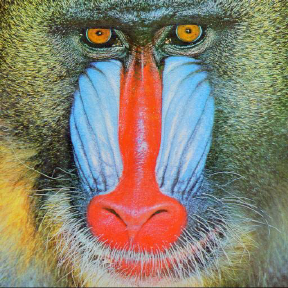

In [42]:
# Se puede desplegar de esta manera
cv2_imshow(img_raw)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Guardar imágenes

In [43]:
# Las imágenes se pueden guardar en el directorio de trabajo de la siguiente manera
cv2.imwrite('final_image.png', img_rgb)

True

### Representación de los diferentes tipos de imágenes

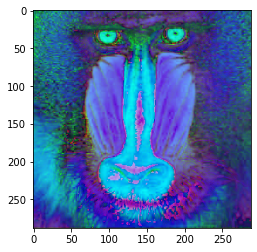

In [44]:
# En Python convertir a BGR a HSV
imagenEnHsv = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)
plt.imshow(imagenEnHsv)

[[144  49 115 ...  68 125 159]
 [ 92  77  73 ... 112 113 112]
 [ 83 118  65 ...  99  78  77]
 ...
 [ 99 128 145 ...  98  92  84]
 [129 141 136 ...  95  89  84]
 [ 80  72  64 ...  45  44  39]]


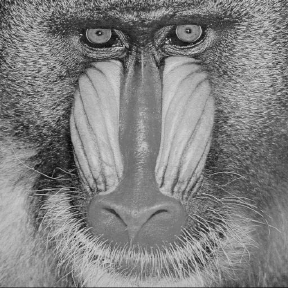

In [45]:
# Intensidad
I = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
print(I)
cv2_imshow(I)
cv2.waitKey(0)
cv2.destroyAllWindows()

la función cv2.threshold se usa para el umbral. 
 

    Sintaxis: cv2.threshold(fuente, valor de umbral, valor máximo, técnica de umbral) 
    Parámetros: 
    -> fuente : matriz de imágenes de entrada (debe estar en escala de grises). 
    -> ThresholdValue: valor del umbral por debajo y por encima del cual los valores de píxeles cambiarán en consecuencia. 
    -> maxVal : Valor máximo que se le puede asignar a un píxel. 
    -> ThresholdingTechnique : el tipo de umbralización que se aplicará. 
     


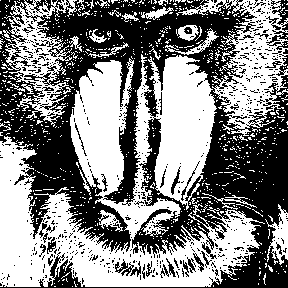

In [46]:
# leer el archivo: Diferentes tipos de banderas 
# https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80
# I = cv2.imread('mandrill_colour.png', cv2.IMREAD_GRAYSCALE)

# definir un umbral, 128 es el medio de blanco y negro en escala de grises
thresh = 128
# asignar canal azul a ceros
img_binary = cv2.threshold(I, thresh, 255, cv2.THRESH_BINARY)[1]

cv2_imshow(img_binary) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

La técnica básica de Umbralización es la Umbralización Binaria. Para cada píxel, se aplica el mismo valor de umbral. Si el valor del píxel es menor que el umbral, se establece en 0; de lo contrario, se establece en un valor máximo.
Las diferentes Técnicas Simples de Umbralización son: 
 

    cv2.THRESH_BINARY : si la intensidad de píxeles es mayor que el umbral establecido, el valor se establece en 255; de lo contrario, se establece en 0 (negro).
    cv2.THRESH_BINARY_INV : Caso invertido o opuesto de cv2.THRESH_BINARY.
    cv.THRESH_TRUNC : si el valor de intensidad de píxel es mayor que el umbral, se trunca al umbral. Los valores de píxel se establecen para que sean los mismos que el umbral. Todos los demás valores siguen siendo los mismos.
    cv.THRESH_TOZERO : la intensidad de píxeles se establece en 0, para todas las intensidades de píxeles, menos que el valor de umbral.
    cv.THRESH_TOZERO_INV : Caso invertido o opuesto de cv2.THRESH_TOZERO.


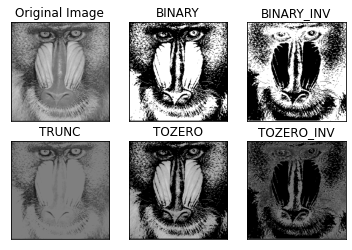

In [47]:
# Diferentes tipos de umbralización

img = url_to_image('https://raw.githubusercontent.com/Detroxsys/RP-2023-2/main/Imagenes/mandrill_colour.png',0)
ret,thresh1 = cv2.threshold(img,127, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127, 255, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127, 255, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127, 255, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()